In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("undersampled_data.csv")
df

,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC,target
0,1750.0,0.0,2015.0,7.0,16.0,$21.42,Swipe Transaction,Lukass Theaters,Tiffin,OH,44883.000000,7832.0,No
1,1959.0,1.0,2016.0,5.0,5.0,$76.99,Chip Transaction,Jadens Wholesale,Lancaster,CA,93535.000000,5300.0,No
2,182.0,2.0,2012.0,11.0,23.0,$2.19,Swipe Transaction,Supermarket Chain 3,Houston,TX,77096.000000,5411.0,No
3,458.0,2.0,2019.0,5.0,15.0,$45.73,Chip Transaction,Supermarket Chain 3,Flint,MI,48532.000000,5411.0,No
4,1949.0,0.0,2018.0,1.0,4.0,$1.25,Chip Transaction,Convenience Store Chain 1,Brooklyn,NY,11213.000000,5499.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,309.0,1.0,2008.0,7.0,1.0,$142.44,Swipe Transaction,Amaris Istanbul Wholesale,Istanbul,Turkey,51694.676895,5310.0,Yes
1740,731.0,0.0,2011.0,9.0,21.0,$33.29,Online Transaction,Department Store 9,ONLINE,CA,51694.676895,5311.0,Yes
1741,1995.0,1.0,2014.0,2.0,9.0,$0.93,Online Transaction,Department Store 10,ONLINE,CA,51694.676895,5311.0,Yes
1742,1075.0,0.0,2016.0,11.0,27.0,$12.22,Chip Transaction,Diaz Ale House,Simi Valley,CA,93065.000000,5813.0,Yes


In [3]:
unique_states = df['MerchantState'].unique()

print("Unique State Names:")
print(unique_states)


Unique State Names:
['OH' 'CA' 'TX' 'MI' 'NY' 'GA' 'MN' 'CO' 'AZ' 'PA' 'AL' 'France' 'NM' 'NC'
 'IN' 'ID' 'FL' 'AR' 'ME' 'SC' 'NE' 'OK' 'MD' 'Mexico' 'NJ' 'ND' 'MA' 'VA'
 'KS' 'WI' 'WA' 'HI' 'LA' 'MO' 'IA' 'MT' 'IL' 'UT' 'KY' 'NV' 'TN' 'DC'
 'Canada' 'Brazil' 'OR' 'SD' 'CT' 'DE' 'VT' 'WV' 'MS' 'AK' 'Jordan'
 'Turkey' 'Honduras' 'India' 'Venezuela' 'Bulgaria' 'Russia'
 'South Africa' 'Guyana' 'Seychelles' 'Madagascar' 'Ukraine' 'Colombia']


In [4]:
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [5]:
df["target"].value_counts()

target
No     872
Yes    872
Name: count, dtype: int64

In [6]:
df.isnull().sum()

User             0
Card             0
Year             0
Month            0
Day              0
Amount           0
UseChip          0
MerchantName     0
MerchantCity     0
MerchantState    0
Zip              0
MCC              0
target           0
dtype: int64

In [7]:
import pandas as pd

# Create a cross-tabulation table
cross_tab = pd.crosstab(df['UseChip'], df['target'])

print("Cross-tabulation Table:")
print(cross_tab)


Cross-tabulation Table:
target               No  Yes
UseChip                     
Chip Transaction    236  184
Online Transaction   96  260
Swipe Transaction   540  428


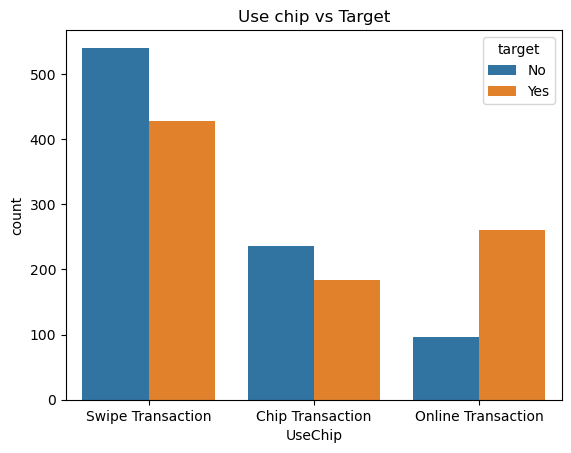

In [8]:
sns.countplot(x='UseChip', hue='target', data=df)
plt.title("Use chip vs Target")
plt.show()

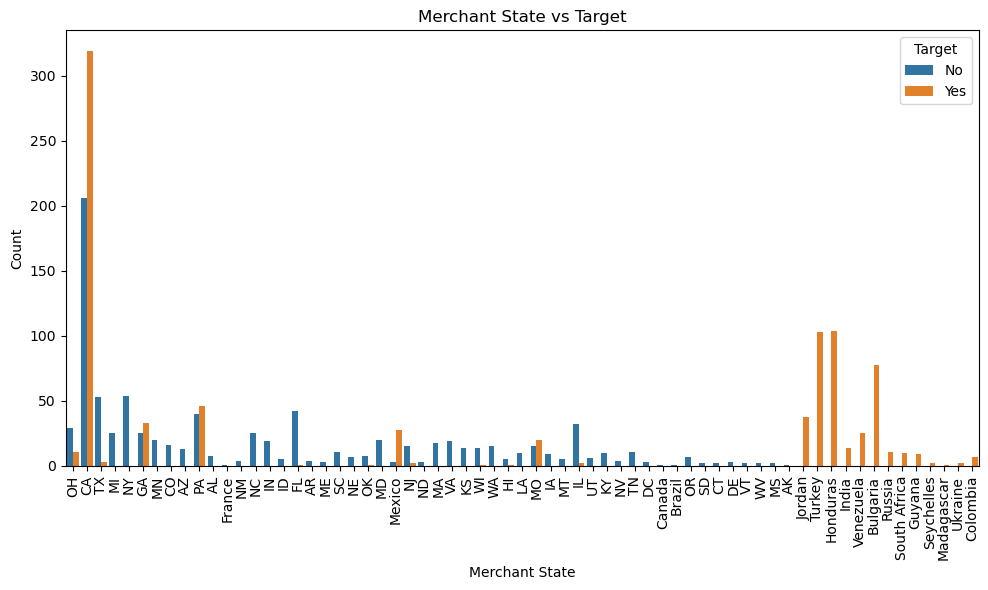

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MerchantState', hue='target', data=df)
plt.title("Merchant State vs Target")
plt.xlabel("Merchant State")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Target', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

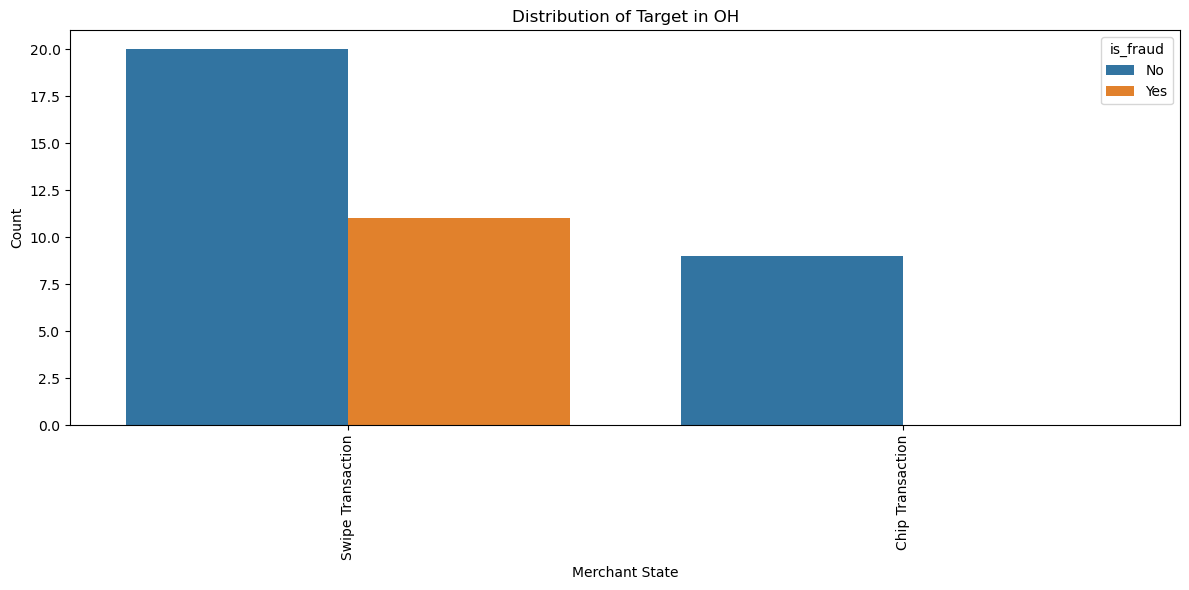

In [10]:
selected_state = 'OH'
selected_data = df[df['MerchantState'] == selected_state]

# Assuming you have the 'user chip', 'state', and 'target' columns in your original DataFrame 'df'
selected_data['user chip'] = df['UseChip']
selected_data['state'] = df['MerchantState']
selected_data['target'] = df['target']

# Grouped count plot for Merchant City, user chip, state, and target
plt.figure(figsize=(12, 6))
sns.countplot(x='UseChip', hue='target', data=selected_data)
plt.title(f'Distribution of Target in {selected_state}')
plt.xlabel('Merchant State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='is_fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

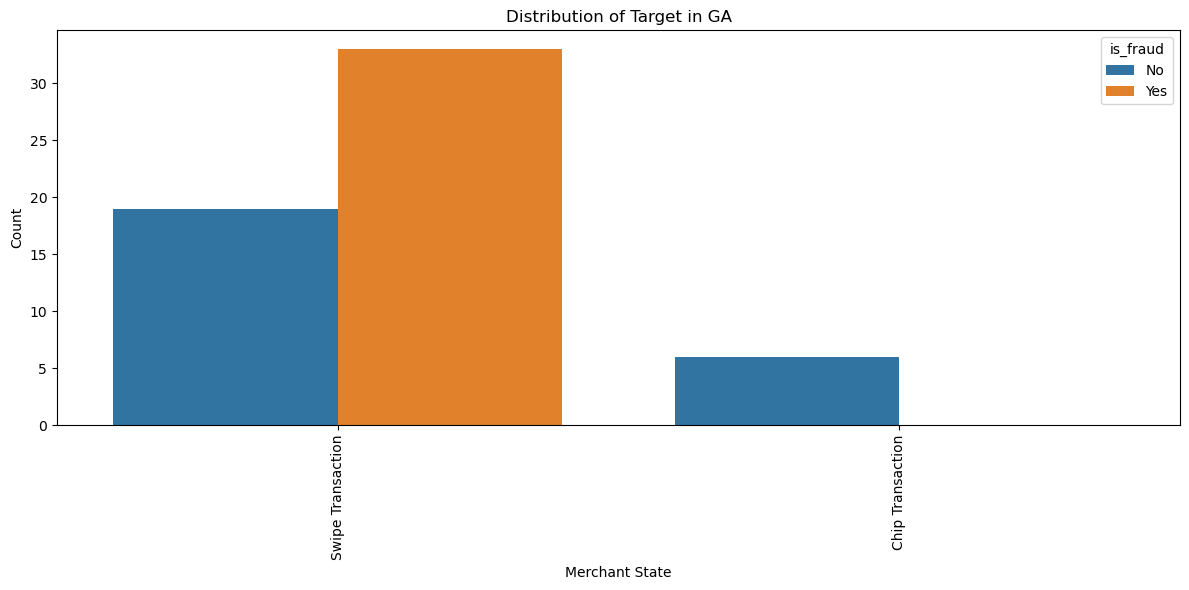

In [11]:
selected_state = 'GA'
selected_data = df[df['MerchantState'] == selected_state]

# Assuming you have the 'user chip', 'state', and 'target' columns in your original DataFrame 'df'
selected_data['user chip'] = df['UseChip']
selected_data['state'] = df['MerchantState']
selected_data['target'] = df['target']

# Grouped count plot for Merchant City, user chip, state, and target
plt.figure(figsize=(12, 6))
sns.countplot(x='UseChip', hue='target', data=selected_data)
plt.title(f'Distribution of Target in {selected_state}')
plt.xlabel('Merchant State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='is_fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

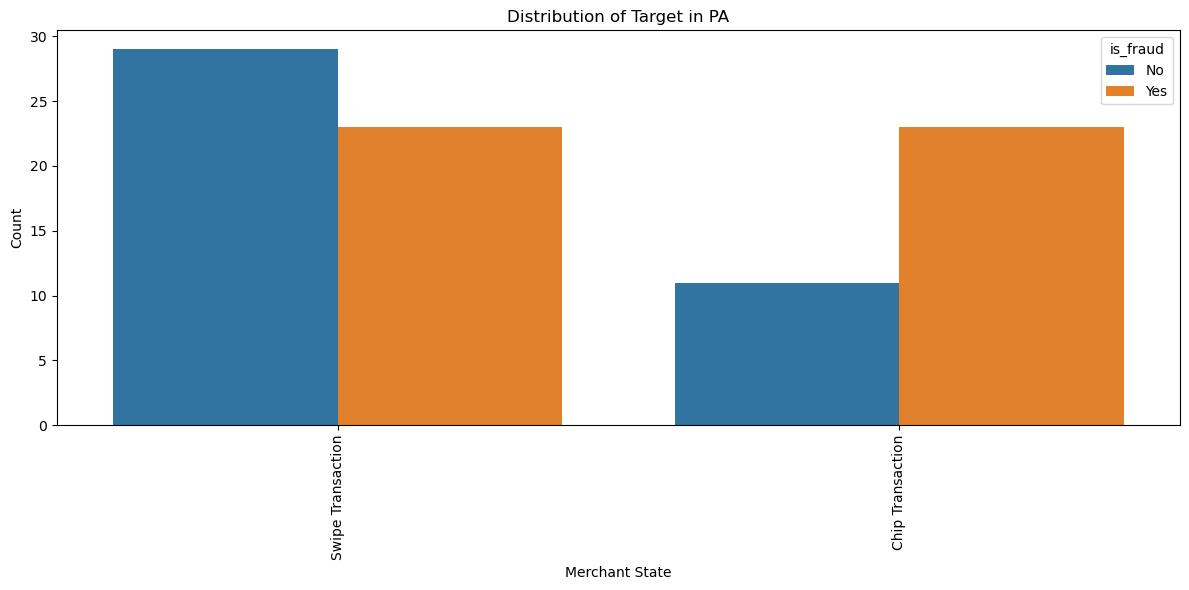

In [12]:
selected_state = 'PA'
selected_data = df[df['MerchantState'] == selected_state]

# Assuming you have the 'user chip', 'state', and 'target' columns in your original DataFrame 'df'
selected_data['user chip'] = df['UseChip']
selected_data['state'] = df['MerchantState']
selected_data['target'] = df['target']

# Grouped count plot for Merchant City, user chip, state, and target
plt.figure(figsize=(12, 6))
sns.countplot(x='UseChip', hue='target', data=selected_data)
plt.title(f'Distribution of Target in {selected_state}')
plt.xlabel('Merchant State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='is_fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

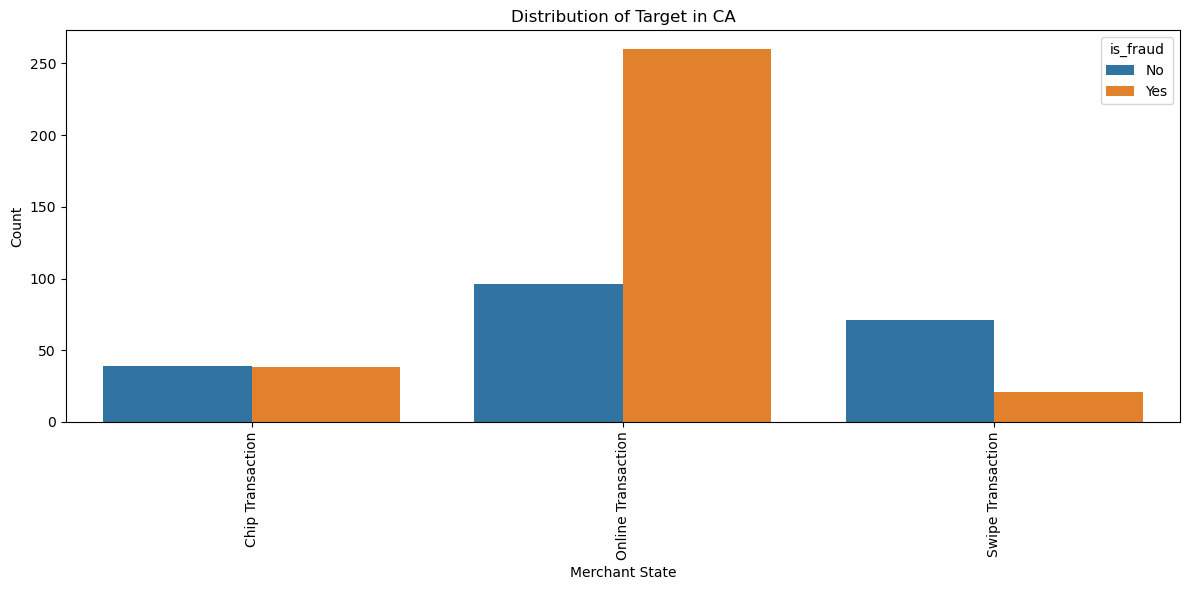

In [13]:
selected_state = 'CA'
selected_data = df[df['MerchantState'] == selected_state]

# Assuming you have the 'user chip', 'state', and 'target' columns in your original DataFrame 'df'
selected_data['user chip'] = df['UseChip']
selected_data['state'] = df['MerchantState']
selected_data['target'] = df['target']

# Grouped count plot for Merchant City, user chip, state, and target
plt.figure(figsize=(12, 6))
sns.countplot(x='UseChip', hue='target', data=selected_data)
plt.title(f'Distribution of Target in {selected_state}')
plt.xlabel('Merchant State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='is_fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

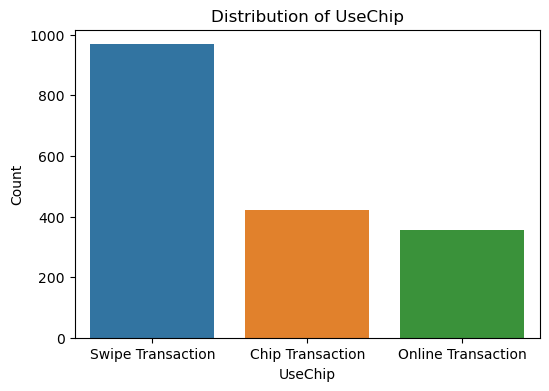

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data distribution by 'UseChip'
plt.figure(figsize=(6, 4))
sns.countplot(x='UseChip', data=df)
plt.title('Distribution of UseChip')
plt.xlabel('UseChip')
plt.ylabel('Count')
plt.show()

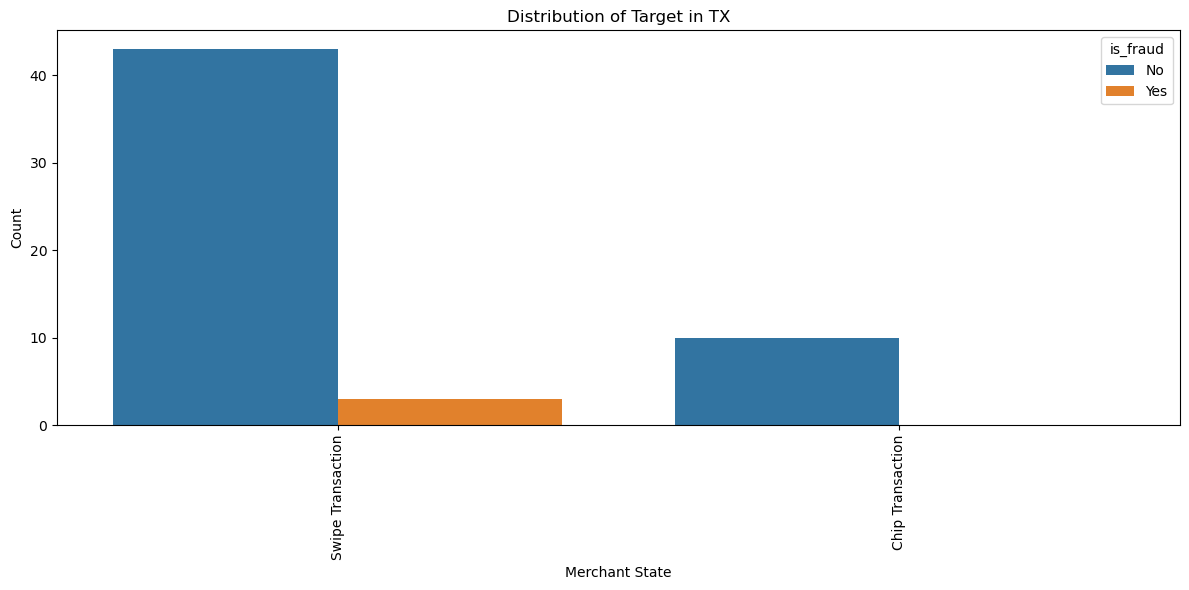

In [15]:
selected_state = 'TX'
selected_data = df[df['MerchantState'] == selected_state]

# Assuming you have the 'user chip', 'state', and 'target' columns in your original DataFrame 'df'
selected_data['user chip'] = df['UseChip']
selected_data['state'] = df['MerchantState']
selected_data['target'] = df['target']

# Grouped count plot for Merchant City, user chip, state, and target
plt.figure(figsize=(12, 6))
sns.countplot(x='UseChip', hue='target', data=selected_data)
plt.title(f'Distribution of Target in {selected_state}')
plt.xlabel('Merchant State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='is_fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

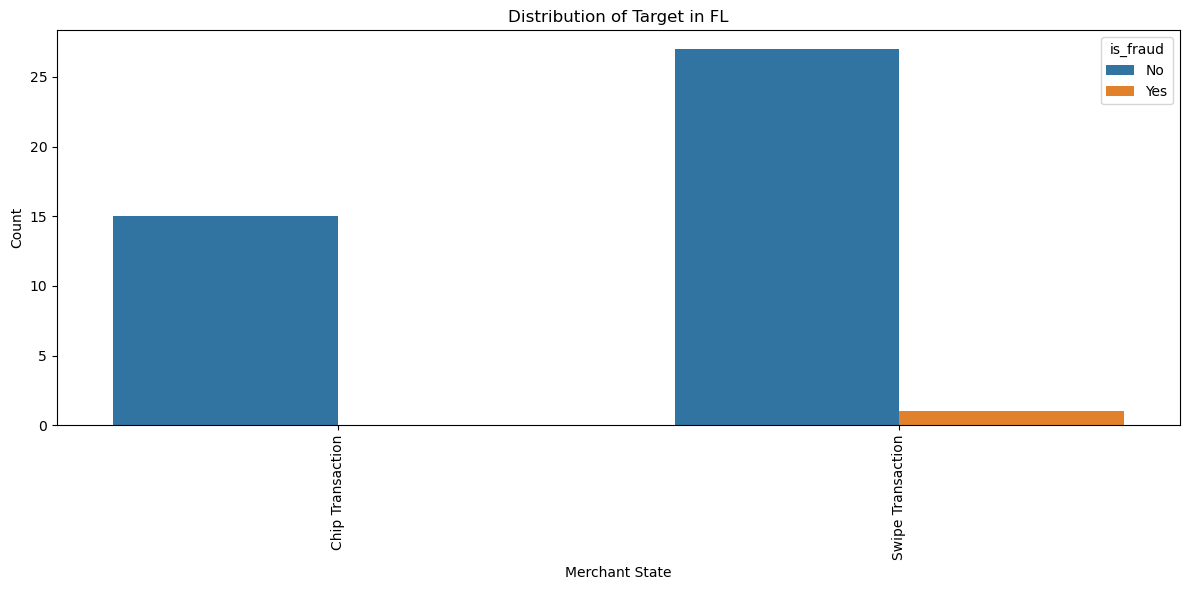

In [16]:
selected_state = 'FL'
selected_data = df[df['MerchantState'] == selected_state]

# Assuming you have the 'user chip', 'state', and 'target' columns in your original DataFrame 'df'
selected_data['user chip'] = df['UseChip']
selected_data['state'] = df['MerchantState']
selected_data['target'] = df['target']

# Grouped count plot for Merchant City, user chip, state, and target
plt.figure(figsize=(12, 6))
sns.countplot(x='UseChip', hue='target', data=selected_data)
plt.title(f'Distribution of Target in {selected_state}')
plt.xlabel('Merchant State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='is_fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

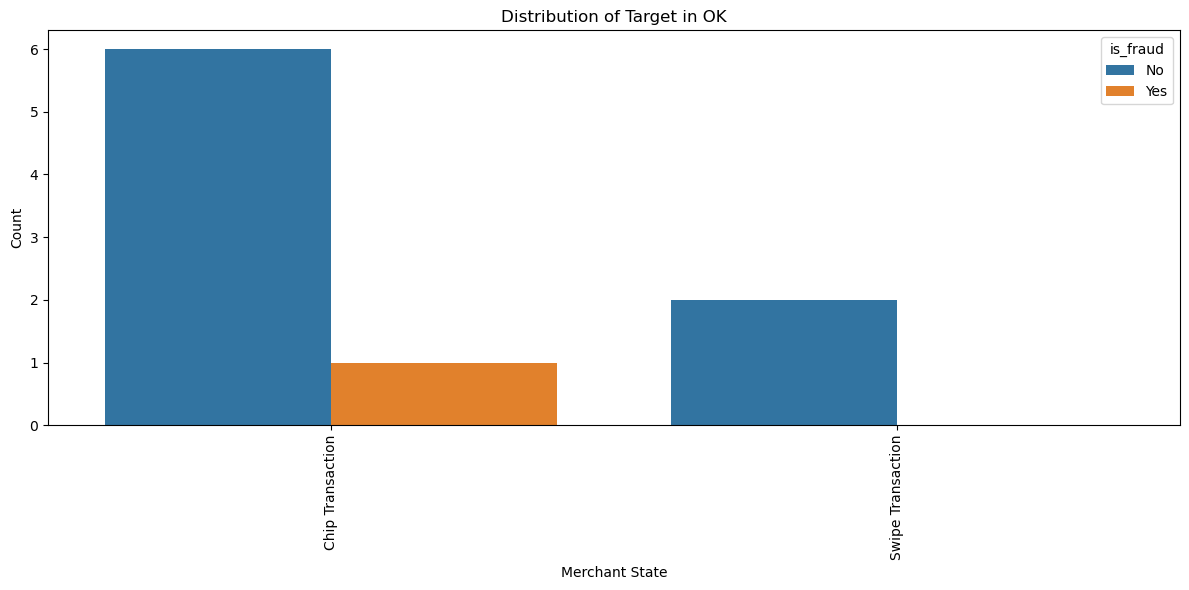

In [17]:
selected_state = 'OK'
selected_data = df[df['MerchantState'] == selected_state]

# Assuming you have the 'user chip', 'state', and 'target' columns in your original DataFrame 'df'
selected_data['user chip'] = df['UseChip']
selected_data['state'] = df['MerchantState']
selected_data['target'] = df['target']

# Grouped count plot for Merchant City, user chip, state, and target
plt.figure(figsize=(12, 6))
sns.countplot(x='UseChip', hue='target', data=selected_data)
plt.title(f'Distribution of Target in {selected_state}')
plt.xlabel('Merchant State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='is_fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()